In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [5]:
toxic_comments = pd.read_csv("/content/drive/MyDrive/Text Mining Project/cleaned_30kundersampling.csv")

In [6]:
toxic_comments

,Unnamed: 0,id,comment_text,severe_toxic,toxic,cleaned_text,count
0,0,c436fcdd4acc928a,naw i am fine see you later guys you rock ) ha...,0,0,nope fine see later guy rock hahahahaha userbi...,44
1,1,17bb9f8b0e2ff008,LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1,0,0,lol reddit pwn lmao unknowntales,28
2,2,e86ae38d7ff0c1ff,You jumped the gun a bit too early - that's my...,0,0,jump gun bit early first revert hour,30
3,3,cb1fcb465bd93930,"No way, Mercedez PWNZ!!",0,0,way mercedez pwnz,15
4,4,140cb8dc1570e423,I noticed it doesn't mention if the real Presi...,0,0,notice mention real president shot,30
...,...,...,...,...,...,...,...
30583,30583,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",0,1,previous conversation fuck shit eating liberal...,804
30584,30584,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,0,1,mischievious pubic hair,21
30585,30585,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,0,1,absurd edits absurd edit great white shark tot...,178
30586,30586,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",0,1,hey listen ever delete edits ever annoy wwe k ...,213


In [7]:
toxic_comments.dropna(inplace=True)
toxic_comments_labels = toxic_comments[["toxic", "severe_toxic"]]

toxic_comments.dropna(inplace=True)

In [8]:
X = []
sentences = list(toxic_comments["cleaned_text"])
for sen in sentences:
    X.append(sen)

y = toxic_comments_labels.values

In [9]:
X


['nope fine see later guy rock hahahahaha userbig foot',
 'lol reddit pwn lmao unknowntales',
 'jump gun bit early first revert hour',
 'way mercedez pwnz',
 'notice mention real president shot',
 'kyle dane john fredirick brennan bear december ohio america bear parent jennifer country music singer grant brennan two old sibling family move los angeles live late kyle parent decide change move sydney australia dane start school attend local public school family seem settle australia kyle father quit business kyle parent divorce mother live small suburb south sydney family home jennifer leave brother currantly reside late kyle prefers call dane interview nashville nancy regan small town reporter tennesse dane currently father comeback country music award interview dane confess got tease lot school kid make tough gay near nkow fact wrds dane use interview dane also state want go business like much good australia father family leave alone medium late dane relationship father sour father mar

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
X_train

['thx hi want thank lot unblocking userpage cheer june',
 'marie lou son possible lose film marie lou son recently list list first animated feature film quirino cristiani el apostol much research online several book film history animation reference make film direct gerard francois garnett haiti quite mysterious fact begin think exsistence could make point little info could also possibility recently discover sure moment seem likely film intrest peludopolis argentina hong gildong korea die sieben raben germany el apostol argentina train arrival russia kutsu juku seiklusi estonia little red rid hood direct walt disney',
 'sad cocksuckerstop edit article otherwise go report sue allow create self way motivate step upwhy fuck would edit article striker stripper also siziba sizzler lucky know racist cuntim ambitious yet bully edit article degrade extentgo fuck let dream',
 'ooh really fuck scar push hard shaft mouth move backwards forward rhythmically white liquid explodes mouth brush teeth',

In [12]:
y_train


array([[0, 0],
       [0, 0],
       [1, 0],
       ...,
       [0, 0],
       [1, 0],
       [1, 0]])

In [13]:
X_test

['know shit fuck talk real game cover real sorry wrong get fuck stalker',
 'g suck ya jackass serious get life come quasihermit',
 'knowin dah dork',
 'production company produce one film till date information already incorporate career section separate section unnecessary talk',
 'wendy get lose really everybody share bigoted view antonio quite frankly fucker compare mercado sexuality babe ruth alcoholism get fuck site',
 'well like say source conflict interest claim reject author also bunch nazis point admit blatant bias article',
 'fuck george akhtak sharmota',
 'fuck idiot admin abuser keep come back edit stay',
 'calibre please read wikipediaciting source reflect citation want wiki well researched article appropriate citation dump',
 'do table list book separately one reference book inline possibly expect one reference book work correct reference first two refs explanation rather citation take suggestion well',
 'effort avoid future edit war want discus feel lead change note previ

In [14]:
y_test

array([[1, 0],
       [1, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 0]])

In [15]:
tokenizer = Tokenizer(num_words=5000, lower = False)
tokenizer.fit_on_texts(str(X_train))

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [16]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [17]:
X_test

array([[ 0,  0,  0, ...,  0,  0,  0],
       [16,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [18]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/MyDrive/Text Mining Project/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [19]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(2, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [20]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 100)          2800      
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 120,306
Trainable params: 117,506
Non-trainable params: 2,800
_________________________________________________________________
None


In [21]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=df04ff00eb53bd0b52d7a84d28357fa042b8a39299135f90d21bb927c6cbc4af
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


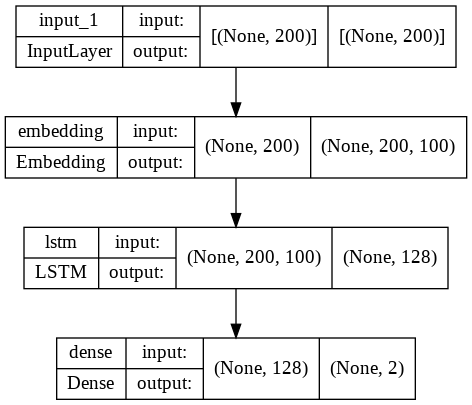

In [22]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [23]:
history = model.fit(X_train, y_train, batch_size=256, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/5
134/134 [==============================] - 116s 849ms/step - loss: 0.4671 - acc: 0.9989 - val_loss: 0.4506 - val_acc: 1.0000
Epoch 2/5
134/134 [==============================] - 98s 726ms/step - loss: 0.4503 - acc: 0.9999 - val_loss: 0.4506 - val_acc: 1.0000
Epoch 3/5
134/134 [==============================] - 109s 813ms/step - loss: 0.4502 - acc: 0.9999 - val_loss: 0.4522 - val_acc: 1.0000
Epoch 4/5
134/134 [==============================] - 105s 782ms/step - loss: 0.4497 - acc: 0.9999 - val_loss: 0.4502 - val_acc: 1.0000
Epoch 5/5
134/134 [==============================] - 117s 867ms/step - loss: 0.4495 - acc: 0.9999 - val_loss: 0.4512 - val_acc: 1.0000


In [24]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

287/287 [==============================] - 28s 99ms/step - loss: 0.4486 - acc: 1.0000
Test Score: 0.4486328065395355
Test Accuracy: 1.0


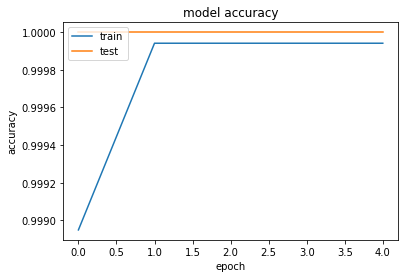

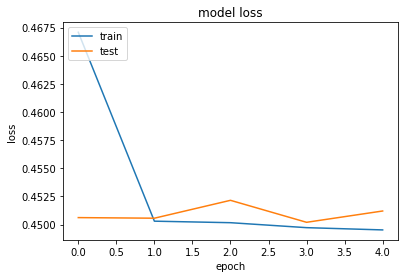

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [27]:
toxic_comments1 = pd.read_csv("/content/drive/MyDrive/Text Mining Project/test_cleaned_14k.csv")

In [35]:
toxic_comments1.dropna(inplace=True)
toxic_comments_labels1 = toxic_comments[["toxic", "severe_toxic"]]

toxic_comments1.dropna(inplace=True)

In [36]:
X1 = []
sentences = list(toxic_comments1["cleaned_text"])
for sen in sentences:
    X1.append(sen)

y1 = toxic_comments_labels1.values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

ValueError: ignored